In [8]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [9]:
%load_ext line_profiler
%load_ext memory_profiler

In [10]:
module = fc.eightb.training.training_5M

def get_files(f):
    return f.replace("ntuple.root","ntuple*.root")

signal = ObjIter([ Tree( get_files(f), report=False) for f in tqdm(module.signal_list)])

100%|██████████| 3/3 [01:53<00:00, 37.90s/it]


In [11]:
yields = signal.apply(lambda t : t.nfound_presel == 8)

In [12]:
yields.apply(len)

[2152140, 3012638, 3276837]

In [13]:
yields.apply(np.sum)

[231968, 485898, 666539]

In [14]:
yields.apply(np.mean)

[0.10778480953841293, 0.16128655351223745, 0.20340926326210307]

In [15]:
total_yield = yields.apply(np.sum).npy.sum()
total_yield

1384405

In [18]:
rates = [300000/total_yield, 500000/total_yield]
rates

[0.21669959296593122, 0.361165988276552]

In [69]:
nrate = [300, 500]

In [71]:
def random_sample(t, rates=rates):
    if '_random' not in t.fields:
        t.extend(_random = ak.from_numpy(np.random.random( len(t.Run) )))
    t.extend(
        **{
            f"mask_{nrate[i]}k":t._random < rate  
            for i, rate in enumerate(rates)
        }
    )

In [72]:
signal.apply(random_sample)

[None, None, None]

100%|██████████| 1/1 [00:10<00:00, 10.62s/it]


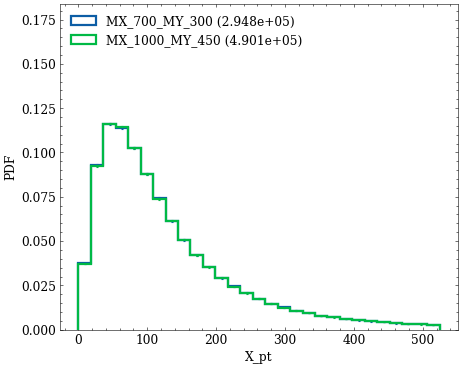

In [74]:
study.quick_region( 
    signal, signal,
    legend=True, h_color=None, h_label_stat="{stats.nevents:0.3e}",
    lumi=None, scale=lambda t:1/t.scale,
    efficiency=True,
    masks = [lambda t : (t.nfound_presel==8)&(t.mask_300k)]*3 + [lambda t : (t.nfound_presel==8)&(t.mask_500k)]*3,
    varlist=['X_pt']
)

In [75]:
signal.write(
    'sampled_{base}'
)

Writing //store/user/ekoenig/8BAnalysis/NTuples/2018/training/training_5M/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_700_MY_300/sampled_ntuple_0.root


[579.5MB/579.5MB][100%][==================================================][96.59MB/s]  


Writing //store/user/ekoenig/8BAnalysis/NTuples/2018/training/training_5M/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_700_MY_300/sampled_ntuple_1.root


[580.2MB/580.2MB][100%][==================================================][82.89MB/s]  


Writing //store/user/ekoenig/8BAnalysis/NTuples/2018/training/training_5M/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_700_MY_300/sampled_ntuple_2.root


[579.4MB/579.4MB][100%][==================================================][115.9MB/s]  


Writing //store/user/ekoenig/8BAnalysis/NTuples/2018/training/training_5M/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_700_MY_300/sampled_ntuple_3.root


[578.8MB/578.8MB][100%][==================================================][82.69MB/s]  


Writing //store/user/ekoenig/8BAnalysis/NTuples/2018/training/training_5M/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_700_MY_300/sampled_ntuple_4.root


[581.3MB/581.3MB][100%][==================================================][116.3MB/s]  


Writing //store/user/ekoenig/8BAnalysis/NTuples/2018/training/training_5M/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_1000_MY_450/sampled_ntuple_0.root


[823.8MB/823.8MB][100%][==================================================][103MB/s]    


Writing //store/user/ekoenig/8BAnalysis/NTuples/2018/training/training_5M/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_1000_MY_450/sampled_ntuple_1.root


[822MB/822MB][100%][==================================================][102.7MB/s]  


Writing //store/user/ekoenig/8BAnalysis/NTuples/2018/training/training_5M/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_1000_MY_450/sampled_ntuple_2.root


[823.5MB/823.5MB][100%][==================================================][91.51MB/s]  


Writing //store/user/ekoenig/8BAnalysis/NTuples/2018/training/training_5M/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_1000_MY_450/sampled_ntuple_3.root


[823.1MB/823.1MB][100%][==================================================][102.9MB/s]  


Writing //store/user/ekoenig/8BAnalysis/NTuples/2018/training/training_5M/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_1000_MY_450/sampled_ntuple_4.root


[822.9MB/822.9MB][100%][==================================================][91.43MB/s]  


Writing //store/user/ekoenig/8BAnalysis/NTuples/2018/training/training_5M/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_1200_MY_500/sampled_ntuple_0.root


[900.9MB/900.9MB][100%][==================================================][100.1MB/s]  


Writing //store/user/ekoenig/8BAnalysis/NTuples/2018/training/training_5M/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_1200_MY_500/sampled_ntuple_1.root


[900.7MB/900.7MB][100%][==================================================][100.1MB/s]  


Writing //store/user/ekoenig/8BAnalysis/NTuples/2018/training/training_5M/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_1200_MY_500/sampled_ntuple_2.root


[899.5MB/899.5MB][100%][==================================================][99.94MB/s]  


Writing //store/user/ekoenig/8BAnalysis/NTuples/2018/training/training_5M/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_1200_MY_500/sampled_ntuple_3.root


[899.5MB/899.5MB][100%][==================================================][99.95MB/s]  


Writing //store/user/ekoenig/8BAnalysis/NTuples/2018/training/training_5M/NMSSM_XYY_YToHH_8b/NMSSM_XYY_YToHH_8b_MX_1200_MY_500/sampled_ntuple_4.root


[900.6MB/900.6MB][100%][==================================================][112.6MB/s]  


[None, None, None]